<a href="https://colab.research.google.com/github/vidakpop/duasa-raffle-challenge/blob/main/DUASA_RAFFLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DUASA RAFFLE CONTEST**
ICEA LION VISIT RAFFLE CONTEST


In [2]:
# Importing necessary libraries
import pandas as pd
import random #for randomizing the raffle/no biasnesss
import matplotlib.pyplot as plt #visualization
import seaborn as sns #enhance visualization

## Loading the dataset


In [11]:
url='https://raw.githubusercontent.com/vidakpop/duasa-raffle-challenge/refs/heads/main/raffle_challenge%20.csv'
df=pd.read_csv(url)

### Display the dataset to ensure:

*   Its accurate as posted
*   No tampering or doctored data



In [12]:
df

,Name,Admission number,Year of study,Mpesa transaction code after payment pay 50 to our treasurer Debbie wainaina via send money 0796935586
0,Natalie Anyango Ochieng,22-2384,Year 3,TB67X1NLW7
1,Cindy Patience,22-2386,Year 3,TB65XWDSX1
2,Felix ng'ang'a,22-2346,Year 3,TB69YWF1S9
3,Patience,23-2069,Year 2,TB793VSCV9
4,Lauryn Gakuna,24-1050,Year 2,TB793Z4QAL
5,Shelmith Mwangi,23-0491,Year 4,TB7841RP2O
6,Alwyne Shikanda,22-2407,Year 3,TB7446XSUS
7,Denzel Ling'ana,23-2351,Year 2,TB784IZT2A
8,Gift Amanya,24- 1868,Year 1,TB744UJJCU
9,Kevin wanjiru,22-2342,Year 3,TB705ZLAOA


In [13]:
# Extract the numeric part of "Year of Study", accounting for potential spaces or case sensitivity

# Assuming the column name in the CSV might have spaces or a different case
year_study_col = next((col for col in df.columns if col.lower().strip() == "year of study"), None)

# If the column is found, proceed with the extraction
if year_study_col:
    df['Numeric_Cohort'] = df[year_study_col].str.extract('(\d+)').astype(int)
else:
    print("Warning: 'Year of Study' column not found in the DataFrame.")

### Verify if the the Year of study matches with numeric_cohort

In [14]:
df

,Name,Admission number,Year of study,Mpesa transaction code after payment pay 50 to our treasurer Debbie wainaina via send money 0796935586,Numeric_Cohort
0,Natalie Anyango Ochieng,22-2384,Year 3,TB67X1NLW7,3
1,Cindy Patience,22-2386,Year 3,TB65XWDSX1,3
2,Felix ng'ang'a,22-2346,Year 3,TB69YWF1S9,3
3,Patience,23-2069,Year 2,TB793VSCV9,2
4,Lauryn Gakuna,24-1050,Year 2,TB793Z4QAL,2
5,Shelmith Mwangi,23-0491,Year 4,TB7841RP2O,4
6,Alwyne Shikanda,22-2407,Year 3,TB7446XSUS,3
7,Denzel Ling'ana,23-2351,Year 2,TB784IZT2A,2
8,Gift Amanya,24- 1868,Year 1,TB744UJJCU,1
9,Kevin wanjiru,22-2342,Year 3,TB705ZLAOA,3


# Count the number of students per year

### Distribution of Students per Year
Below is a visualization showing the number of students in each year of study.


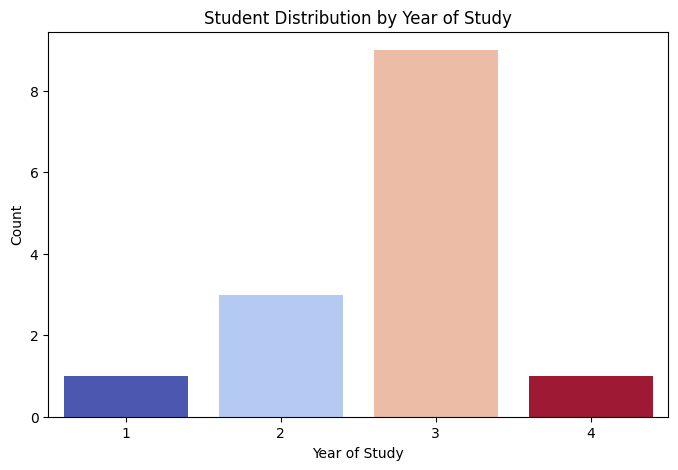

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="Numeric_Cohort", hue="Numeric_Cohort", data=df, palette="coolwarm", legend=False)
plt.title("Student Distribution by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Count")
plt.show()

#Raffle selection
  

*   Ensure its random




In [18]:
first_year_winner = df[df["Numeric_Cohort"] == 1].sample(n=1, random_state=42)
second_year_winners = df[df["Numeric_Cohort"] == 2].sample(n=2, random_state=42)
third_year_winners = df[df["Numeric_Cohort"] == 3].sample(n=7, random_state=42)
fourth_year_winners = df[df["Numeric_Cohort"] == 4].sample(n=0, random_state=42)

#Combine all the winners for each cohort

In [19]:
winners = pd.concat([first_year_winner, second_year_winners, third_year_winners])


#🥁Drumrolls the winners are

### Winners Distribution
This visualization shows the distribution of selected winners across the years.


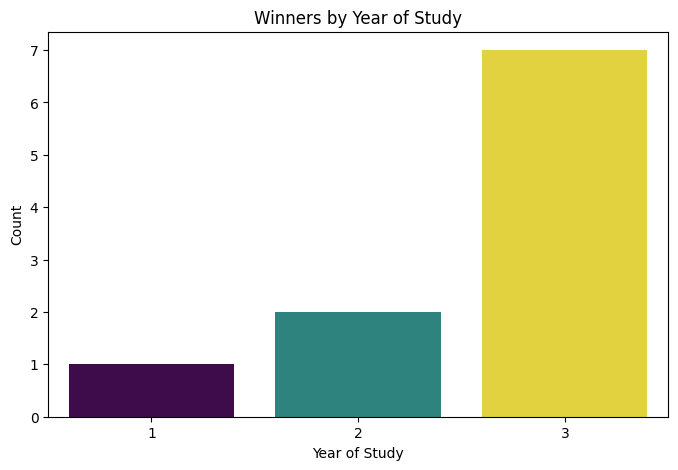

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Numeric_Cohort", hue="Numeric_Cohort", data=winners, palette="viridis", legend=False)
plt.title("Winners by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Count")
plt.show()

In [24]:
# Dropping columns that are not needed
winners.drop(['Mpesa transaction code after payment       pay 50 to our treasurer  Debbie wainaina via send money 0796935586'], axis=1, inplace=True)

In [27]:
winners.drop(['Numeric_Cohort'], axis=1, inplace=True)


#🎉 Drumroll, Please! 🎉

And the moment you’ve all been waiting for... here are our Raffle Winners! 🏆✨

**Cue the confetti! 🎊**

In [28]:
display(winners)

,Name,Admission number,Year of study
8,Gift Amanya,24- 1868,Year 1
3,Patience,23-2069,Year 2
4,Lauryn Gakuna,24-1050,Year 2
12,Debbie Wainaina,22-2396,Year 3
1,Cindy Patience,22-2386,Year 3
10,Kelvin kithia,22-2357,Year 3
0,Natalie Anyango Ochieng,22-2384,Year 3
13,Wangare Njoroge,22-2324,Year 3
2,Felix ng'ang'a,22-2346,Year 3
9,Kevin wanjiru,22-2342,Year 3


#Save the winners to a csv file that will be sent to the group Combine all winners




In [29]:
winners.to_csv("raffle_winners.csv", index=False)


## Conclusion
- The raffle successfully selected 1 first-year, 2 second-years, and 7 third-years.
- Visualizations show the overall distribution of students and winners.
- Winners' data has been saved in `raffle_winners.csv` for reference.



# **Arigatou gozaimasu**

> *Davis Ngetich*

